#### 한 도시의 공유자전거의 대여횟수(cnt)와 이에 영향을 미치는 다른 변수들이 `BikeSharingDaily.csv`에 저장되어 있다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
data_path = "./data/"

bike = pd.read_csv(data_path+'BikeSharingDaily.csv')

In [2]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


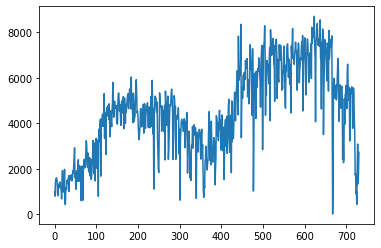

In [3]:
plt.plot(bike.cnt)
plt.show()

#### 1. 7일 이동평균선을 사용하여 대여횟수를 평활하여라. 2012년 12월 25일의 예측오차는 무엇인가?

In [4]:
bike['7rol']=bike.cnt.rolling(7).mean()

In [5]:
bike[bike.dteday=='2012-12-25']['cnt']-bike[bike.dteday=='2012-12-25']['7rol']

724   -1628.0
dtype: float64

#### 2. 평활상수 0.5를 사용하여 지수가중이동평균(EWMA)을 사용하여 대여횟수를 평활하여라.  2012년 12월 25일의 예측오차는 무엇인가?

In [6]:
bike['ewm']=bike.cnt.ewm(alpha=0.5, adjust = False).mean()

In [7]:
bike[bike.dteday=='2012-12-25']['cnt']-bike[bike.dteday=='2012-12-25']['ewm']

724   -314.561235
dtype: float64

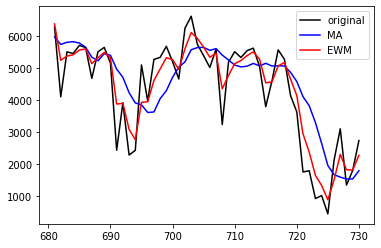

In [8]:
line1,=plt.plot(bike.cnt[-50:], color='black')
line2,=plt.plot(bike['7rol'][-50:], color='blue')
line3,=plt.plot(bike['ewm'][-50:], color='red')
plt.legend([line1,line2, line3],['original','MA','EWM'])
plt.show()

#### 3. 대여횟수를 시계열분해하여 오차를 변수명 'resid'로 저장하시오. 

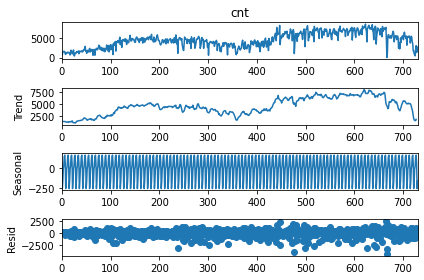

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(bike.cnt, model='additive', 
                            period=7)
result.plot()
plt.show()

In [10]:
bike['resid']=result.resid
bike.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,7rol,ewm,resid
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749,4099.285714,2941.489877,-963.190349
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787,3813.714286,2364.244938,93.222966
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920,3290.142857,1642.122469,-582.397007
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013,2641.000000,1327.561235,-570.444617
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441,1951.571429,884.280617,-1121.544891
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,1663.857143,1499.140309,432.814999
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,1588.428571,2297.070154,1134.253185
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,1530.142857,1819.035077,NaN
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1531.428571,1807.517539,NaN
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,1789.857143,2268.258769,NaN


#### 4.`resid` 변수의 ACF, PACF 그림을 그리고 ARMA 모형을 사용한다면 그 차수를 판별하시오. 

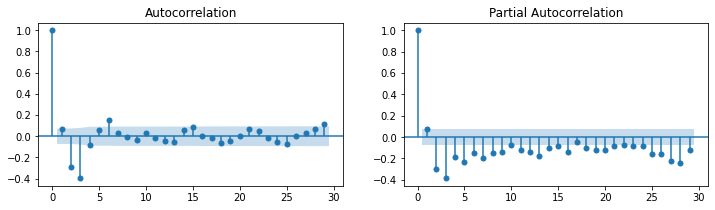

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1,2, figsize=(12,3))
plot_acf(bike.resid.dropna(),ax=axes[0])
plot_pacf(bike.resid.dropna(), ax=axes[1] )
plt.show()

	      AR(p)      MA(q)            ARMA(p, q)
ACF  --	Tails off	   /      Cuts off after lag q	/  Tails off\
PACF --	Cuts off after lag p   /	Tails off      /    	Tails off


ACF 와 PACF의 그래프를 보니 MA(3)이다.